In [4]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# Set data file location
# If you are running notebooks on your laptop, change this to the directory
# where you put downloaded files

from pathlib import Path

DATA = Path("/content/drive/My Drive/Genomic_Project")

In [6]:
import pandas as pd

# Read the new CSV file into a DataFrame
df_antibody = pd.read_csv('/content/drive/My Drive/Genomic_Project/antibody-by-week.csv')

FileNotFoundError: ignored

In [ ]:
drive_path = '/content/drive/My Drive/Genomic_Project'
import os
os.makedirs(drive_path, exist_ok=True)


In [ ]:
df_antibody['week_ending'] = pd.to_datetime(df_antibody['week_ending'], format='%m/%d/%Y')

df_antibody['month'] = df_antibody['week_ending'].dt.month
df_antibody['year'] = df_antibody['week_ending'].dt.year

result_antibody = df_antibody.groupby(['year', 'month'])['PERCENT_POSITIVE'].mean().reset_index()

result_antibody['year_month'] = result_antibody['year'].astype(str) + '-' + result_antibody['month'].astype(str)

result_antibody.to_csv(os.path.join(drive_path, 'average_antibody_by_month.csv'), index=False)

print(result_antibody[['year_month', 'PERCENT_POSITIVE']])

   year_month  PERCENT_POSITIVE
0      2020-4          0.459333
1      2020-5          0.327600
2      2020-6          0.245500
3      2020-7          0.202250
4      2020-8          0.203200
5      2020-9          0.203500
6     2020-10          0.215800
7     2020-11          0.216500
8     2020-12          0.242750
9      2021-1          0.303200
10     2021-2          0.391250
11     2021-3          0.442250
12     2021-4          0.564000
13     2021-5          0.657600
14     2021-6          0.699250
15     2021-7          0.725800
16     2021-8          0.749250
17     2021-9          0.768250
18    2021-10          0.784000
19    2021-11          0.725250
20    2021-12          0.712750
21     2022-1          0.771200
22     2022-2          0.800500
23     2022-3          0.838000
24     2022-4          0.838400
25     2022-5          0.861750
26     2022-6          0.846750


In [ ]:
import pandas as pd
import numpy as np
drive_path = '/content/drive/My Drive/Genomic_Project'
import os
os.makedirs(drive_path, exist_ok=True)
file_path = '/content/drive/My Drive/Genomic_Project/Variant_Tracking_Results.csv'
df = pd.read_csv(file_path, encoding='latin1')
variant_columns = ['Alpha (B.1.1.7)', 'Beta (B.1.351)', 'Gamma (P.1)', 'Zeta (P.2)', 'Eta (B.1.525)',
                   'Kappa (B.1.617.1)', 'Delta (B.1.617)', 'Delta (AY.1)', 'Delta (AY.4)', 'Lambda (C.37)',
                   'Mu (B.1.621)', 'Omicron (BA.1)', 'Omicron (BA.2)', 'Omicron (BA.3/BA.4)', 'Other Omicron']

rate_columns = ['Positive Rate', 'Hosp Rate', 'Death Rate', 'Anti Rate']

correlation_matrix = df[variant_columns + rate_columns].corr()
correlation_matrix.to_csv(os.path.join(drive_path, 'correlation_matrix.csv'), index=False)

print(correlation_matrix)

                     Alpha (B.1.1.7)  Beta (B.1.351)  Gamma (P.1)  Zeta (P.2)  \
Alpha (B.1.1.7)             1.000000        0.812861     0.417381   -0.254169   
Beta (B.1.351)              0.812861        1.000000     0.474113   -0.212435   
Gamma (P.1)                 0.417381        0.474113     1.000000    0.155723   
Zeta (P.2)                 -0.254169       -0.212435     0.155723    1.000000   
Eta (B.1.525)              -0.217376       -0.174861    -0.194755    0.830577   
Kappa (B.1.617.1)          -0.205506       -0.171889    -0.195709    0.836711   
Delta (B.1.617)            -0.268786       -0.223704     0.463798    0.842036   
Delta (AY.1)               -0.192812       -0.157265    -0.181109    0.891121   
Delta (AY.4)                0.054418       -0.047805    -0.145989    0.746351   
Lambda (C.37)               0.018617        0.236096    -0.155565   -0.117502   
Mu (B.1.621)                0.098356        0.264377    -0.154792   -0.133483   
Omicron (BA.1)             -

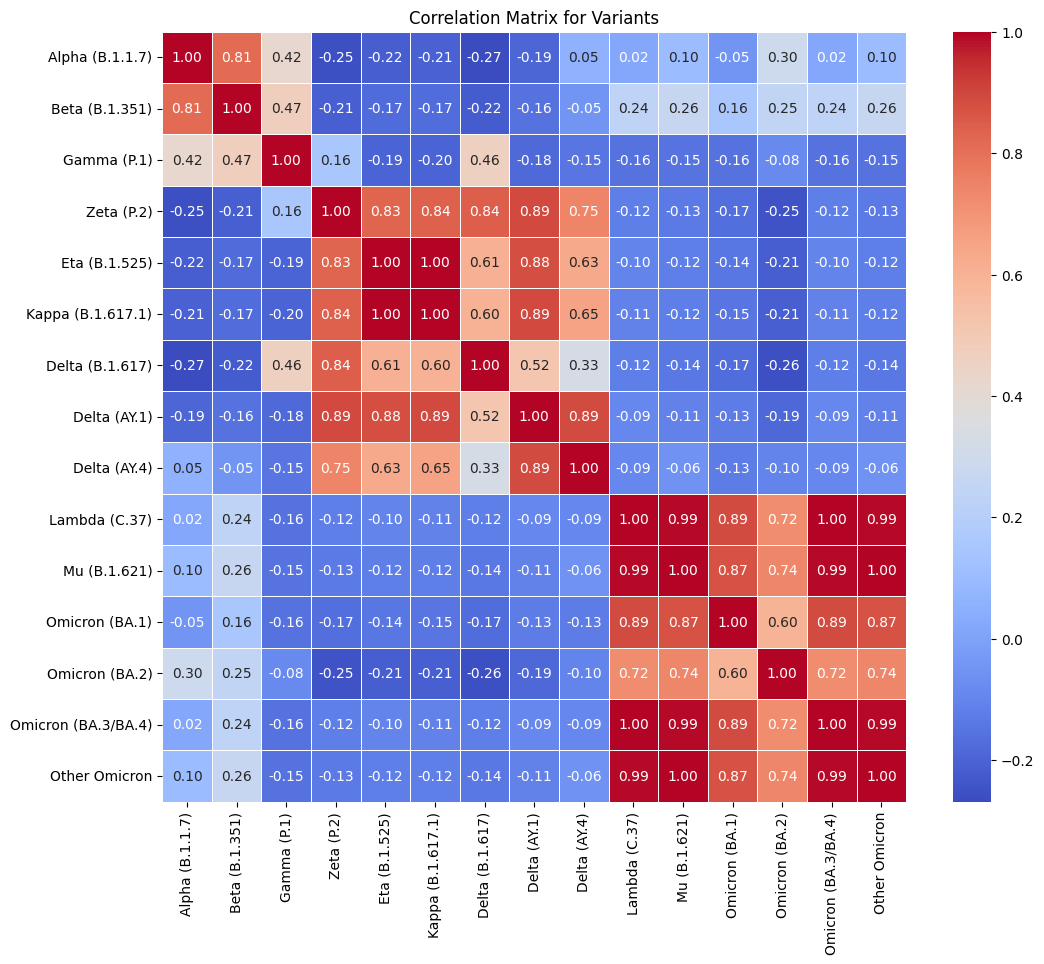

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Genomic_Project/Variant_Tracking_Results.csv'
df = pd.read_csv(file_path, encoding='latin1')

variant_columns = ['Alpha (B.1.1.7)', 'Beta (B.1.351)', 'Gamma (P.1)', 'Zeta (P.2)', 'Eta (B.1.525)',
                   'Kappa (B.1.617.1)', 'Delta (B.1.617)', 'Delta (AY.1)', 'Delta (AY.4)', 'Lambda (C.37)',
                   'Mu (B.1.621)', 'Omicron (BA.1)', 'Omicron (BA.2)', 'Omicron (BA.3/BA.4)', 'Other Omicron']
rate_columns = ['Positive Rate', 'Hosp Rate', 'Death Rate', 'Anti Rate']
correlation_matrix = df[variant_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Variants')
plt.show()

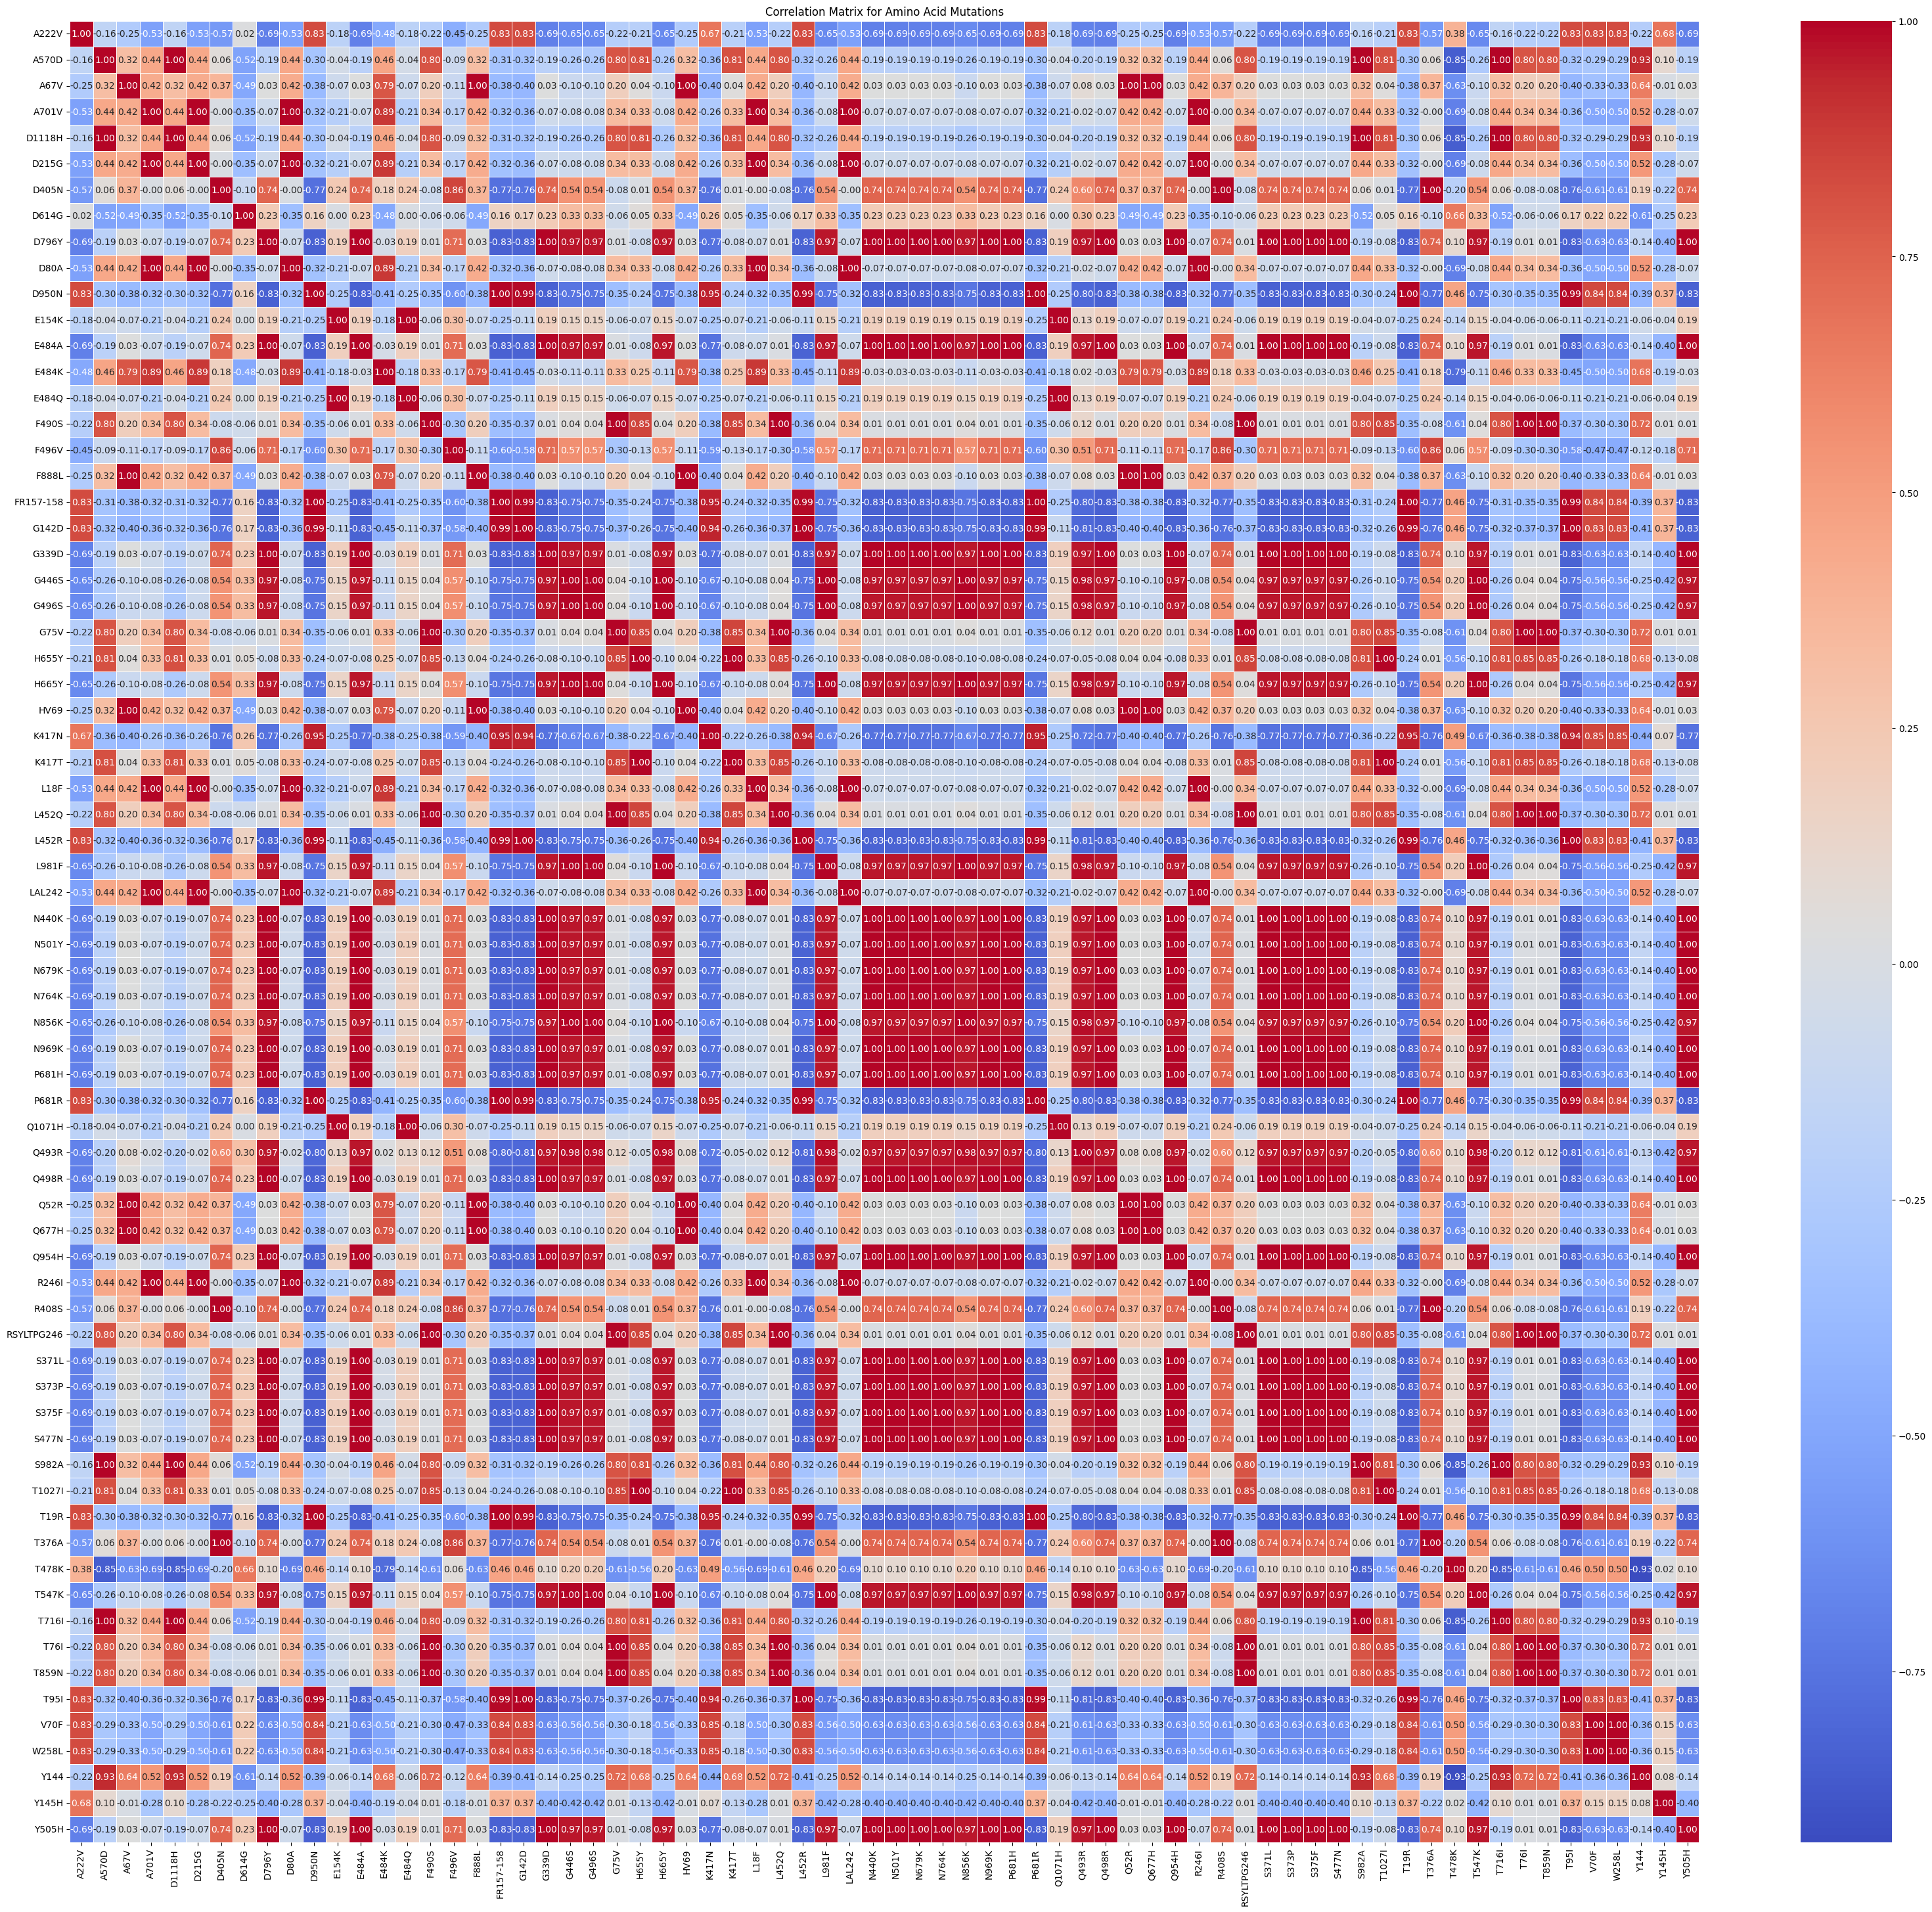

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
file_path = '/content/drive/My Drive/Genomic_Project/Amino Acid Mutation.xlsx'
df = pd.read_excel(file_path)

mutation_columns = [
    'A222V', 'A570D', 'A67V', 'A701V', 'D1118H', 'D215G', 'D405N', 'D614G', 'D796Y', 'D80A',
    'D950N', 'E154K', 'E484A', 'E484K', 'E484Q', 'F490S', 'F496V', 'F888L', 'FR157-158', 'G142D',
    'G339D', 'G446S', 'G496S', 'G75V', 'H655Y', 'H665Y', 'HV69', 'K417N', 'K417T', 'L18F', 'L452Q',
    'L452R', 'L981F', 'LAL242', 'N440K', 'N501Y', 'N679K', 'N764K', 'N856K', 'N969K', 'P681H', 'P681R',
    'Q1071H', 'Q493R', 'Q498R', 'Q52R', 'Q677H', 'Q954H', 'R246I', 'R408S', 'RSYLTPG246', 'S371L', 'S373P',
    'S375F', 'S477N', 'S982A', 'T1027I', 'T19R', 'T376A', 'T478K', 'T547K', 'T716I', 'T76I', 'T859N', 'T95I',
    'V70F', 'W258L', 'Y144', 'Y145H', 'Y505H'
]

correlation_matrix = df[mutation_columns].corr()

plt.figure(figsize=(40, 36))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Amino Acid Mutations')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
file_path = '/content/drive/My Drive/Genomic_Project/Amino Acid Mutation.xlsx'
df = pd.read_excel(file_path)

mutation_columns = [
    'A222V', 'A570D', 'A67V', 'A701V', 'D1118H', 'D215G', 'D405N', 'D614G', 'D796Y', 'D80A',
    'D950N', 'E154K', 'E484A', 'E484K', 'E484Q', 'F490S', 'F496V', 'F888L', 'FR157-158', 'G142D',
    'G339D', 'G446S', 'G496S', 'G75V', 'H655Y', 'H665Y', 'HV69', 'K417N', 'K417T', 'L18F', 'L452Q',
    'L452R', 'L981F', 'LAL242', 'N440K', 'N501Y', 'N679K', 'N764K', 'N856K', 'N969K', 'P681H', 'P681R',
    'Q1071H', 'Q493R', 'Q498R', 'Q52R', 'Q677H', 'Q954H', 'R246I', 'R408S', 'RSYLTPG246', 'S371L', 'S373P',
    'S375F', 'S477N', 'S982A', 'T1027I', 'T19R', 'T376A', 'T478K', 'T547K', 'T716I', 'T76I', 'T859N', 'T95I',
    'V70F', 'W258L', 'Y144', 'Y145H', 'Y505H'
]
rate_columns = ['Positive Rate', 'Hosp Rate', 'Death Rate', 'Anti Rate']

correlation_matrix = df[mutation_columns + rate_columns].corr()
correlation_matrix.to_csv(os.path.join(drive_path, 'correlation_matrix2.csv'), index=False)

